In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot


In [19]:

# Load the Alcohol Sales data and check first few records
alcoholSales = pd.read_csv('/content/Alcohol_Sales.csv')
print("Loaded Alcohol Sales data")
print(alcoholSales.head())


Loaded Alcohol Sales data
         DATE  S4248SM144NCEN
0  1992-01-01            3459
1  1992-02-01            3458
2  1992-03-01            4002
3  1992-04-01            4564
4  1992-05-01            4221


In [20]:

# Convert 'DATE' columns to DATEtime format for both datasets
alcoholSales['DATE'] = pd.to_datetime(alcoholSales['DATE'])

# Set 'DATE' as the index to make it time series
alcoholSales.set_index('DATE', inplace=True)


In [21]:

# Check if there are any missing values in both datasets
missingValuesAlcohol = alcoholSales.isnull().sum()

print("\nMissing values in Alcohol Sales data:")
print(missingValuesAlcohol)



Missing values in Alcohol Sales data:
S4248SM144NCEN    0
dtype: int64


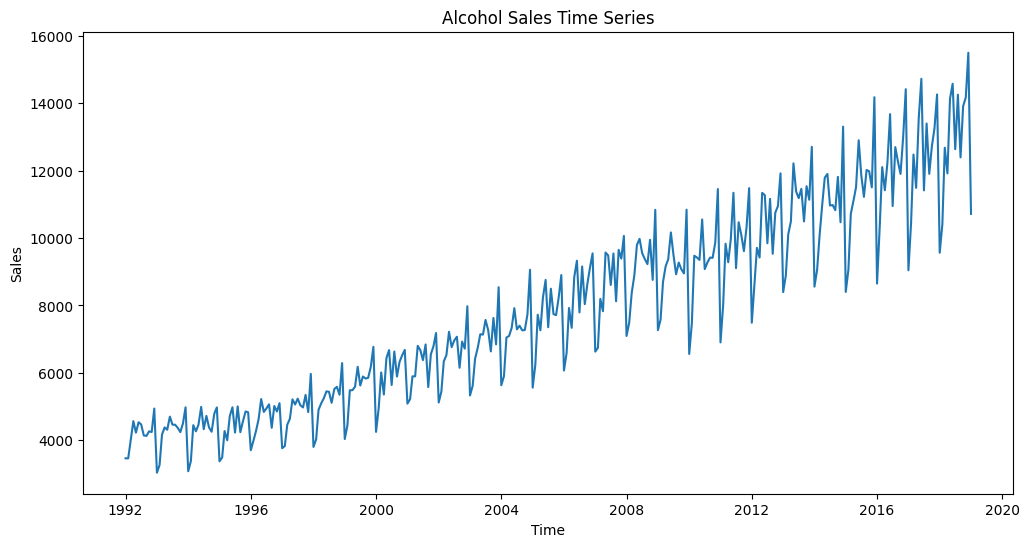

In [22]:

# Plotting the Alcohol Sales data to visualize trends
plt.figure(figsize=(12, 6))
plt.plot(alcoholSales, label='Alcohol Sales')
plt.title('Alcohol Sales Time Series')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()

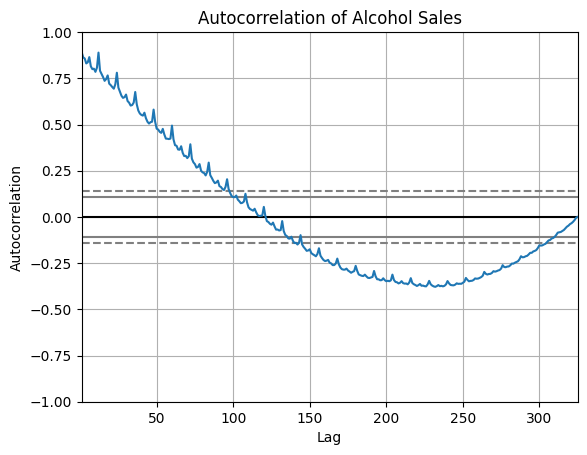

In [23]:


# Autocorrelation plot for Alcohol Sales data to identify patterns
autocorrelation_plot(alcoholSales)
plt.title('Autocorrelation of Alcohol Sales')
plt.show()


In [24]:


# Fit an ARIMA model to the Alcohol Sales data (order can be adjusted)
arimaAlcohol = ARIMA(alcoholSales, order=(5, 1, 0))
fittedModelAlcohol = arimaAlcohol.fit()
print(fittedModelAlcohol.summary())


                               SARIMAX Results                                
Dep. Variable:         S4248SM144NCEN   No. Observations:                  325
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2696.108
Date:                Sun, 11 Aug 2024   AIC                           5404.217
Time:                        20:37:29   BIC                           5426.901
Sample:                    01-01-1992   HQIC                          5413.271
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7379      0.045    -16.578      0.000      -0.825      -0.651
ar.L2         -0.5999      0.073     -8.167      0.000      -0.744      -0.456
ar.L3         -0.4727      0.074     -6.399      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



Alcohol Sales Forecast:
2019-02-01    13355.736336
2019-03-01    12865.816795
2019-04-01    13117.071596
2019-05-01    13846.708308
2019-06-01    14104.798196
2019-07-01    12471.954068
2019-08-01    13259.824590
2019-09-01    13055.808058
2019-10-01    13059.767081
2019-11-01    13528.362809
2019-12-01    13577.956012
2020-01-01    13023.169199
Freq: MS, Name: predicted_mean, dtype: float64


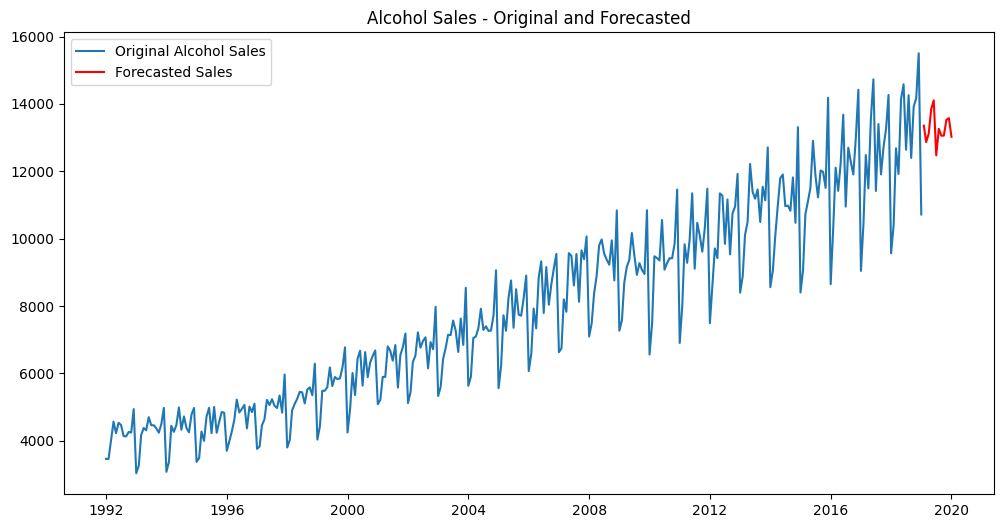

In [25]:


# Forecasting the next 12 months for Alcohol Sales
alcoholForecast = fittedModelAlcohol.forecast(steps=12)
print("\nAlcohol Sales Forecast:")
print(alcoholForecast)

# Plotting the original Alcohol Sales and its forecast
plt.figure(figsize=(12, 6))
plt.plot(alcoholSales, label='Original Alcohol Sales')
plt.plot(alcoholForecast, label='Forecasted Sales', color='red')
plt.title('Alcohol Sales - Original and Forecasted')
plt.legend()
plt.show()


In [26]:

# Load the Miles Traveled data and preview it
milesTraveled = pd.read_csv('/content/Miles_Traveled.csv')
print("\nLoaded Miles Traveled data")
print(milesTraveled.head())
milesTraveled['DATE'] = pd.to_datetime(milesTraveled['DATE'])


Loaded Miles Traveled data
         DATE  TRFVOLUSM227NFWA
0  1970-01-01           80173.0
1  1970-02-01           77442.0
2  1970-03-01           90223.0
3  1970-04-01           89956.0
4  1970-05-01           97972.0


In [27]:
milesTraveled.set_index('DATE', inplace=True)


In [28]:
missingValuesMiles = milesTraveled.isnull().sum()


In [29]:

print("\nMissing values in Miles Traveled data:")
print(missingValuesMiles)



Missing values in Miles Traveled data:
TRFVOLUSM227NFWA    0
dtype: int64


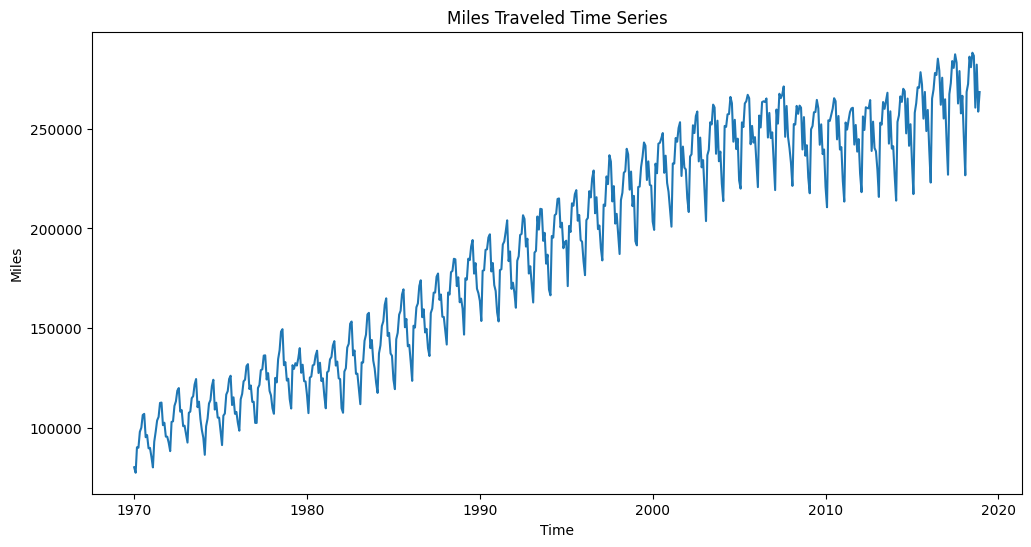

In [30]:

# Plotting the Miles Traveled data to visualize trends
plt.figure(figsize=(12, 6))
plt.plot(milesTraveled, label='Miles Traveled')
plt.title('Miles Traveled Time Series')
plt.xlabel('Time')
plt.ylabel('Miles')
plt.show()


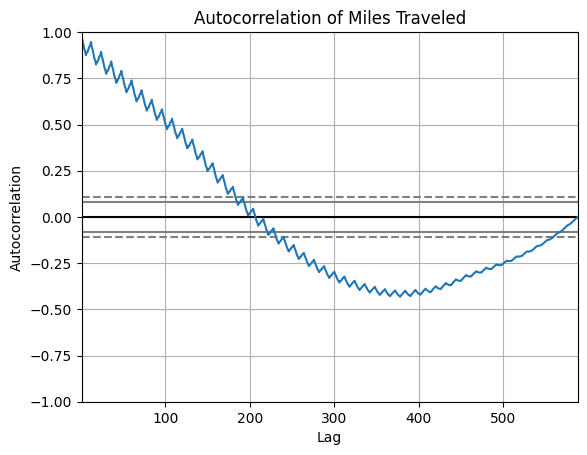

In [31]:

# Autocorrelation plot for Miles Traveled data
autocorrelation_plot(milesTraveled)
plt.title('Autocorrelation of Miles Traveled')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:       TRFVOLUSM227NFWA   No. Observations:                  588
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -6329.625
Date:                Sun, 11 Aug 2024   AIC                          12671.251
Time:                        20:37:31   BIC                          12697.501
Sample:                    01-01-1970   HQIC                         12681.479
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1790      0.046     -3.897      0.000      -0.269      -0.089
ar.L2          0.1411      0.050      2.836      0.005       0.044       0.239
ar.L3         -0.0088      0.070     -0.126      0.8

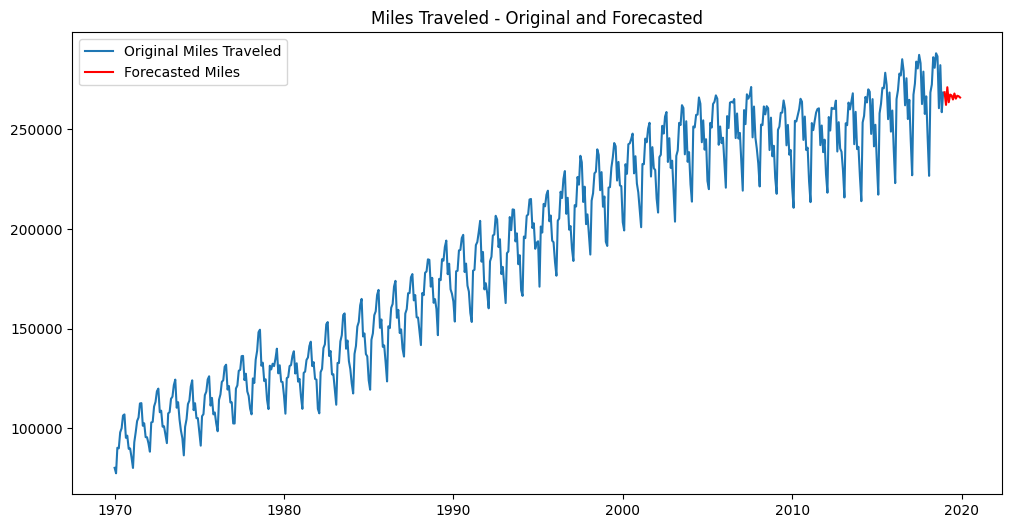

In [32]:

# Fit an ARIMA model to the Miles Traveled data
arimaMiles = ARIMA(milesTraveled, order=(5, 1, 0))
fittedModelMiles = arimaMiles.fit()
print(fittedModelMiles.summary())

# Forecasting the next 12 months for Miles Traveled
milesForecast = fittedModelMiles.forecast(steps=12)
print("\nMiles Traveled Forecast:")
print(milesForecast)

# Plotting the original Miles Traveled and its forecast
plt.figure(figsize=(12, 6))
plt.plot(milesTraveled, label='Original Miles Traveled')
plt.plot(milesForecast, label='Forecasted Miles', color='red')
plt.title('Miles Traveled - Original and Forecasted')
plt.legend()
plt.show()
